# Loss Functions

This python script illustrates the different loss functions for regression and classification.

We start by loading the ncessary libraries and resetting the computational graph.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

### Create a Graph Session

In [2]:
sess = tf.Session()

## Numerical Predictions

---------------------------------

To start with our investigation of loss functions, we begin by looking at numerical loss functions.  To do so, we must create a sequence of predictions around a target.  For this exercise, we consider the target to be zero.

In [3]:
# Various Predicted X-values
x_vals = tf.linspace(-1., 1., 500)

# Create our target of zero
target = tf.constant(0.)

### L2 Loss

The L2 loss is one of the most common regression loss functions.  Here we show how to create it in TensorFlow and we evaluate it for plotting later.

In [4]:
# L2 loss
# L = (pred - actual)^2
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

### L1 Loss

An alternative loss function to consider is the L1 loss. This is very similar to L2 except that we take the `absolute value` of the difference instead of squaring it.

In [5]:
# L1 loss
# L = abs(pred - actual)
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

### Pseudo-Huber Loss

The psuedo-huber loss function is a smooth approximation to the L1 loss as the (predicted - target) values get larger.  When the predicted values are close to the target, the pseudo-huber loss behaves similar to the L2 loss.

In [6]:
# L = delta^2 * (sqrt(1 + ((pred - actual)/delta)^2) - 1)

# Pseudo-Huber with delta = 0.25
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

# Pseudo-Huber with delta = 5
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

### Plot the Regression Losses

Here we use Matplotlib to plot the L1, L2, and Pseudo-Huber Losses.

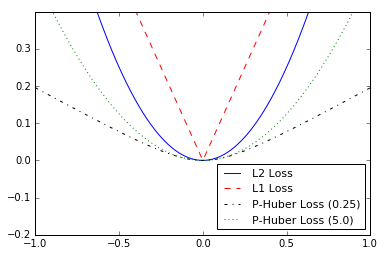

In [7]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

## Categorical Predictions

-------------------------------

We now consider categorical loss functions.  Here, the predictions will be around the target of 1.

In [8]:
# Various predicted X values
x_vals = tf.linspace(-3., 5., 500)

# Target of 1.0
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

### Hinge Loss

The hinge loss is useful for categorical predictions.  Here is is the `max(0, 1-(pred*actual))`.

In [9]:
# Hinge loss
# Use for predicting binary (-1, 1) classes
# L = max(0, 1 - (pred * actual))
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

### Cross Entropy Loss

The cross entropy loss is a very popular way to measure the loss between categorical targets and output model logits.  You can read about the details more here: https://en.wikipedia.org/wiki/Cross_entropy

In [10]:
# Cross entropy loss
# L = -actual * (log(pred)) - (1-actual)(log(1-pred))
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

### Sigmoid Entropy Loss

TensorFlow also has a sigmoid-entropy loss function.  This is very similar to the above cross-entropy function except that we take the sigmoid of the predictions in the function.

In [28]:
# L = -actual * (log(sigmoid(pred))) - (1-actual)(log(1-sigmoid(pred)))
# or
# L = max(actual, 0) - actual * pred + log(1 + exp(-abs(actual)))
x_val_input = tf.expand_dims(x_vals, 1)
target_input = tf.expand_dims(targets, 1)
xentropy_sigmoid_y_vals = tf.nn.softmax_cross_entropy_with_logits(logits=x_val_input, labels=target_input)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

### Weighted (Softmax) Cross Entropy Loss

Tensorflow also has a similar function to the `sigmoid cross entropy` loss function above, but we take the softmax of the actuals and weight the predicted output instead.

In [32]:
# Weighted (softmax) cross entropy loss
# L = -actual * (log(pred)) * weights - (1-actual)(log(1-pred))
# or
# L = (1 - pred) * actual + (1 + (weights - 1) * pred) * log(1 + exp(-actual))
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

### Plot the Categorical Losses

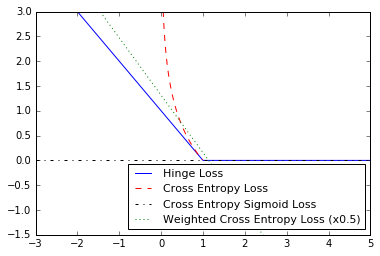

In [33]:
# Plot the output
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
plt.ylim(-1.5, 3)
#plt.xlim(-1, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

### Softmax entropy and Sparse Entropy

Since it is hard to graph mutliclass loss functions, we will show how to get the output instead

In [36]:
# Softmax entropy loss
# L = -actual * (log(softmax(pred))) - (1-actual)(log(1-softmax(pred)))
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits,
                                                           labels=target_dist)
print(sess.run(softmax_xentropy))

# Sparse entropy loss
# Use when classes and targets have to be mutually exclusive
# L = sum( -actual * log(pred) )
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy =  tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits,
                                                                  labels=sparse_target_dist)
print(sess.run(sparse_xentropy))

[ 1.16012561]
[ 0.00012564]
